This notebook evaluates the trained EEGNet with imagined binary class model on the validation set using classification metrics and confusion matrix.

- Model: EEGNet
- Input: 64 channels × 320 time points
- Classes: [0: left, 1: right]

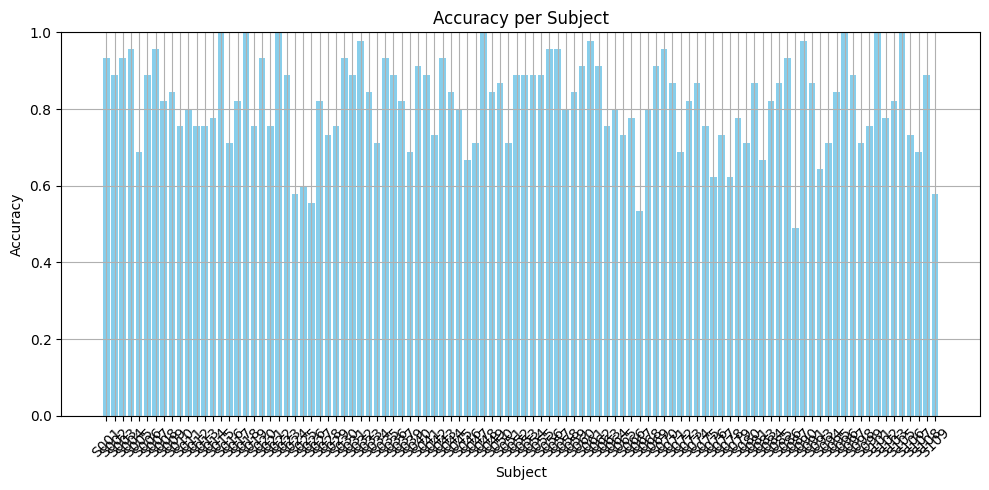

In [2]:
import json
import matplotlib.pyplot as plt

with open("c:/Users/Dell/Desktop/FYP/eeg-fyp/models/all_subjects_results.json", "r") as f:
    results = json.load(f)

subjects = list(results.keys())
accuracies = [results[subj]["accuracy"] for subj in subjects]

plt.figure(figsize=(10, 5))
plt.bar(subjects, accuracies, color='skyblue')
plt.ylabel("Accuracy")
plt.xlabel("Subject")
plt.title("Accuracy per Subject")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


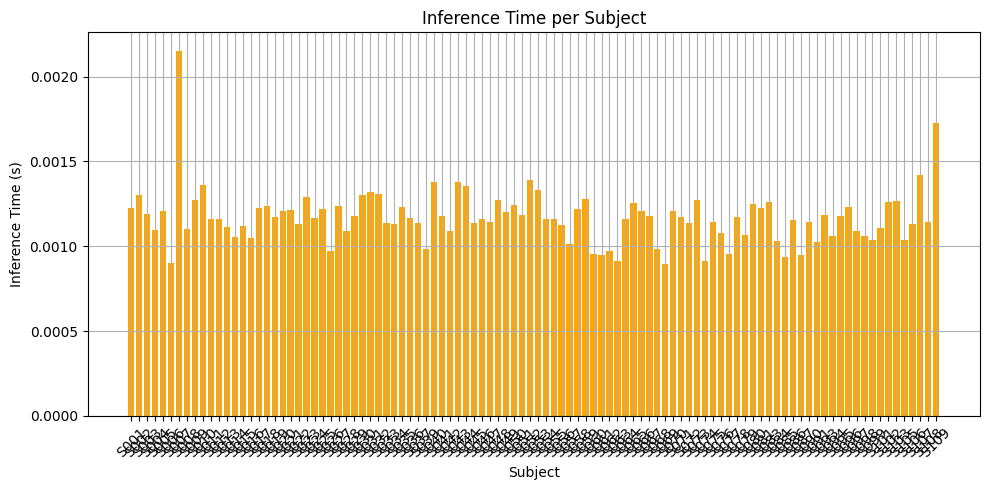

In [5]:
import json
import matplotlib.pyplot as plt

# Load the JSON data
with open("c:/Users/Dell/Desktop/FYP/eeg-fyp/models/all_subjects_results.json", "r") as f:
    results = json.load(f)

subjects = list(results.keys())
inference_times = [results[subj]["inference_time_sec"] for subj in subjects]

# Bar chart
plt.figure(figsize=(10, 5))
plt.bar(subjects, inference_times, color='orange')
plt.xlabel("Subject")
plt.ylabel("Inference Time (s)")
plt.title("Inference Time per Subject")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


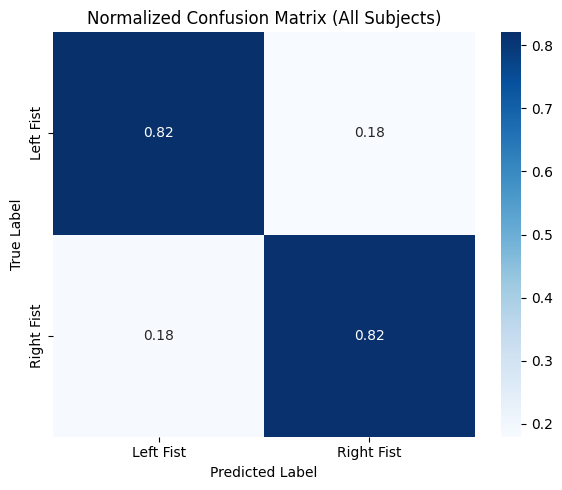

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the results
with open("c:/Users/Dell/Desktop/FYP/eeg-fyp/models/all_subjects_results.json", "r") as f:
    results = json.load(f)

# Initialize total confusion matrix
total_cm = np.zeros((2, 2))

# Sum all confusion matrices
for subj in results:
    cm = np.array(results[subj]["confusion_matrix"])
    total_cm += cm

# Normalize by row (true class)
normalized_cm = total_cm / total_cm.sum(axis=1, keepdims=True)

# Plot normalized confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f", xticklabels=['Left Fist', 'Right Fist'], yticklabels=['Left Fist', 'Right Fist'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix (All Subjects)')
plt.tight_layout()
plt.show()


In [4]:
import json

# Load the JSON data
with open("c:/Users/Dell/Desktop/FYP/eeg-fyp/models/all_subjects_results.json", "r") as f:
    results = json.load(f)

# Extract subject IDs
subjects = list(results.keys())

# Get inference times
inference_times = [results[subj]["inference_time_sec"] for subj in subjects]

# Print inference time per subject
print("🕒 Inference Time per Subject:")
for subj, inf_time in zip(subjects, inference_times):
    print(f"{subj}: {inf_time:.6f} seconds")

# Calculate and print average inference time
average_time = sum(inference_times) / len(inference_times)
print(f"\n📊 Average Inference Time: {average_time:.6f} seconds")


🕒 Inference Time per Subject:
S001: 0.001224 seconds
S002: 0.001305 seconds
S003: 0.001190 seconds
S004: 0.001097 seconds
S005: 0.001209 seconds
S006: 0.000901 seconds
S007: 0.002154 seconds
S008: 0.001100 seconds
S009: 0.001270 seconds
S010: 0.001362 seconds
S011: 0.001161 seconds
S012: 0.001162 seconds
S013: 0.001113 seconds
S014: 0.001056 seconds
S015: 0.001119 seconds
S016: 0.001048 seconds
S017: 0.001229 seconds
S018: 0.001240 seconds
S019: 0.001175 seconds
S020: 0.001206 seconds
S021: 0.001212 seconds
S022: 0.001132 seconds
S023: 0.001288 seconds
S024: 0.001164 seconds
S025: 0.001220 seconds
S026: 0.000971 seconds
S027: 0.001236 seconds
S028: 0.001089 seconds
S029: 0.001179 seconds
S030: 0.001305 seconds
S031: 0.001321 seconds
S032: 0.001309 seconds
S033: 0.001139 seconds
S034: 0.001130 seconds
S035: 0.001234 seconds
S036: 0.001167 seconds
S037: 0.001137 seconds
S039: 0.000987 seconds
S040: 0.001381 seconds
S041: 0.001178 seconds
S042: 0.001091 seconds
S043: 0.001378 seconds
S044

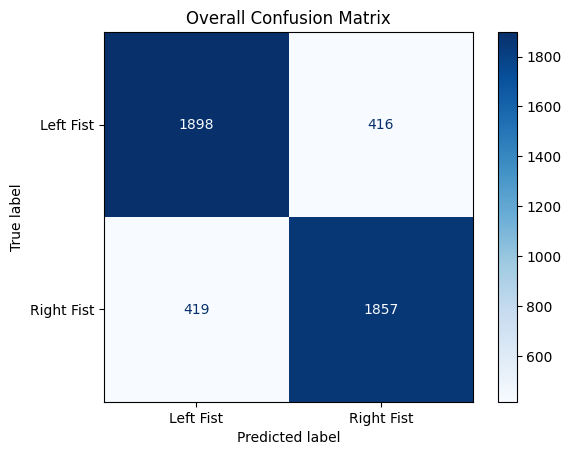

In [11]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


# Initialize combined confusion matrix
overall_cm = np.array([[0, 0],
                       [0, 0]])

# Sum up confusion matrices from all subjects
for subject in results:
    cm = np.array(results[subject]["confusion_matrix"])
    overall_cm += cm

# Plot the overall confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=overall_cm, display_labels=["Left Fist", "Right Fist"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Overall Confusion Matrix")
plt.grid(False)
plt.show()


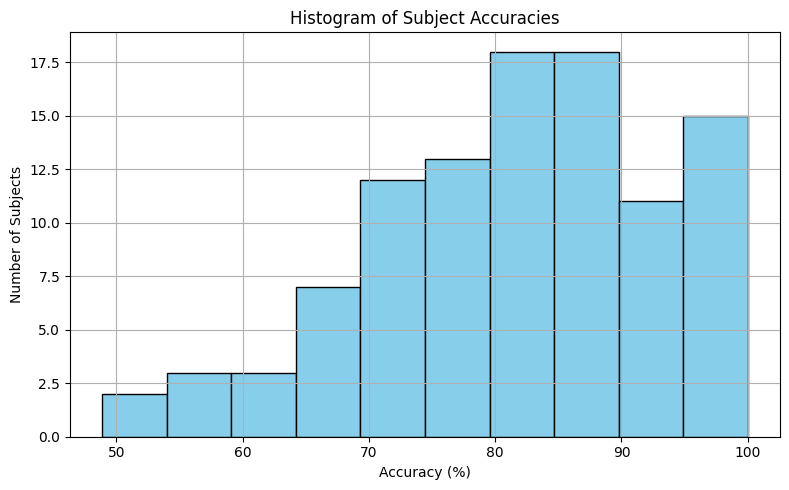

In [12]:
import json
import matplotlib.pyplot as plt


# Extract accuracies
subjects = list(results.keys())
accuracies = [results[subj]["accuracy"] * 100 for subj in subjects]  # convert to %

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(accuracies, bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of Subject Accuracies")
plt.xlabel("Accuracy (%)")
plt.ylabel("Number of Subjects")
plt.grid(True)
plt.tight_layout()
plt.show()


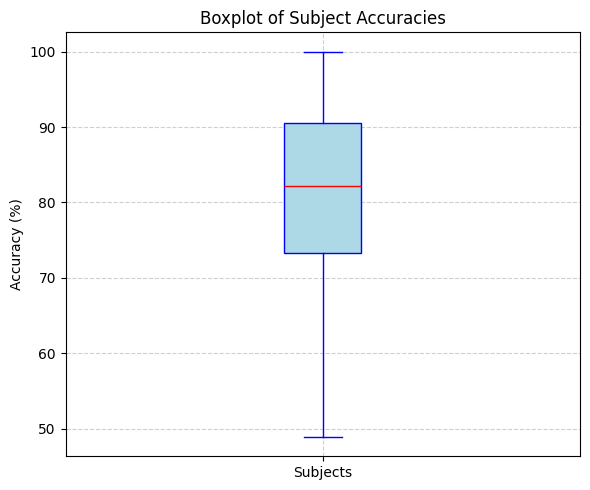

In [13]:
import json
import matplotlib.pyplot as plt

# Extract accuracies and convert to percentage
accuracies = [results[subj]["accuracy"] * 100 for subj in results.keys()]

# Create boxplot
plt.figure(figsize=(6, 5))
plt.boxplot(accuracies, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'))

plt.ylabel("Accuracy (%)")
plt.title("Boxplot of Subject Accuracies")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks([1], ['Subjects'])
plt.tight_layout()
plt.show()


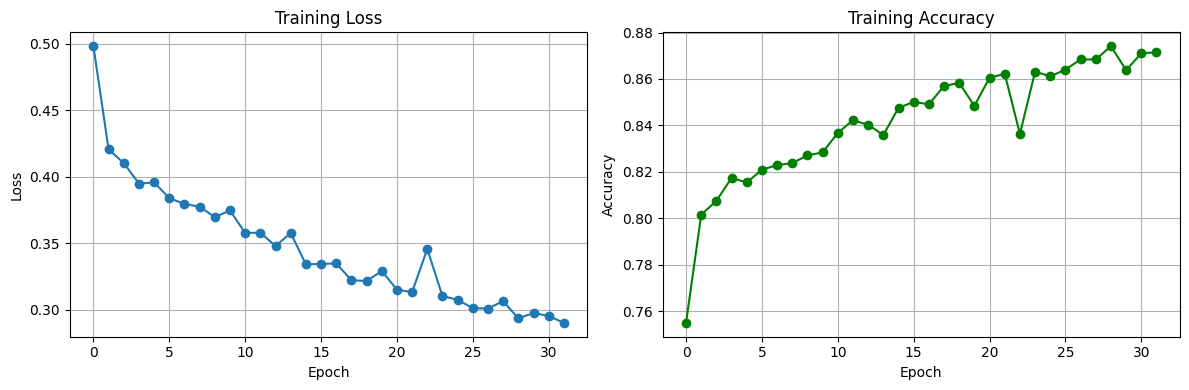

In [3]:
subject = "S001"  # Change to any subject ID
loss = results[subject]["loss"]
acc = results[subject]["accuracy_history"]

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss, marker='o')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(acc, marker='o', color='green')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.show()


In [14]:
from tabulate import tabulate
import json


# Prepare data for the table
table = []
for subject, metrics in results.items():
    acc_percent = metrics["accuracy"] * 100
    table.append([subject, f"{acc_percent:.2f}%"])

# Print the table
print(tabulate(table, headers=["Subject", "Accuracy"], tablefmt="github"))


| Subject   | Accuracy   |
|-----------|------------|
| S001      | 93.33%     |
| S002      | 88.89%     |
| S003      | 93.33%     |
| S004      | 95.56%     |
| S005      | 68.89%     |
| S006      | 88.89%     |
| S007      | 95.56%     |
| S008      | 82.22%     |
| S009      | 84.44%     |
| S010      | 75.56%     |
| S011      | 80.00%     |
| S012      | 75.56%     |
| S013      | 75.56%     |
| S014      | 77.78%     |
| S015      | 100.00%    |
| S016      | 71.11%     |
| S017      | 82.22%     |
| S018      | 100.00%    |
| S019      | 75.56%     |
| S020      | 93.33%     |
| S021      | 75.56%     |
| S022      | 100.00%    |
| S023      | 88.89%     |
| S024      | 57.78%     |
| S025      | 60.00%     |
| S026      | 55.56%     |
| S027      | 82.22%     |
| S028      | 73.33%     |
| S029      | 75.56%     |
| S030      | 93.33%     |
| S031      | 88.89%     |
| S032      | 97.78%     |
| S033      | 84.44%     |
| S034      | 71.11%     |
| S035      | 93.33%     |
|

In [18]:
accuracies_percent = [results[subj]['accuracy'] * 100 for subj in results]
for acc in accuracies_percent:
    print(f"{acc:.2f}%")

93.33%
88.89%
93.33%
95.56%
68.89%
88.89%
95.56%
82.22%
84.44%
75.56%
80.00%
75.56%
75.56%
77.78%
100.00%
71.11%
82.22%
100.00%
75.56%
93.33%
75.56%
100.00%
88.89%
57.78%
60.00%
55.56%
82.22%
73.33%
75.56%
93.33%
88.89%
97.78%
84.44%
71.11%
93.33%
88.89%
82.22%
68.89%
91.11%
88.89%
73.33%
93.33%
84.44%
80.00%
66.67%
71.11%
100.00%
84.44%
86.67%
71.11%
88.89%
88.89%
88.89%
88.89%
95.56%
95.56%
80.00%
84.44%
91.11%
97.78%
91.11%
75.56%
80.00%
73.33%
77.78%
53.33%
80.00%
91.11%
95.56%
86.67%
68.89%
82.22%
86.67%
75.56%
62.22%
73.33%
62.22%
77.78%
71.11%
86.67%
66.67%
82.22%
86.67%
93.33%
48.89%
97.78%
86.67%
64.44%
71.11%
84.44%
100.00%
88.89%
71.11%
75.56%
100.00%
77.78%
82.22%
100.00%
73.33%
68.89%
88.89%
57.78%


In [15]:
# Assuming 'results' is already loaded as a dictionary from your JSON file
subjects = list(results.keys())
print("List of subjects:")
for subj in subjects:
    print(subj)


List of subjects:
S001
S002
S003
S004
S005
S006
S007
S008
S009
S010
S011
S012
S013
S014
S015
S016
S017
S018
S019
S020
S021
S022
S023
S024
S025
S026
S027
S028
S029
S030
S031
S032
S033
S034
S035
S036
S037
S039
S040
S041
S042
S043
S044
S045
S046
S047
S048
S049
S050
S051
S052
S053
S054
S055
S056
S057
S058
S059
S060
S061
S062
S063
S064
S065
S066
S067
S068
S069
S070
S071
S072
S073
S074
S075
S076
S077
S078
S079
S080
S081
S083
S084
S085
S086
S087
S090
S091
S093
S094
S095
S096
S097
S098
S099
S101
S102
S103
S105
S106
S107
S108
S109


In [5]:
# Initialize accumulators
total_accuracy = 0
total_precision = 0
total_recall = 0
total_f1 = 0
n = len(results)

# Iterate through subjects
for subject, metrics in results.items():
    total_accuracy += metrics["accuracy"]
    precision_avg = (metrics["leftfist_precision"] + metrics["rightfist_precision"]) / 2
    recall_avg = (metrics["leftfist_recall"] + metrics["rightfist_recall"]) / 2
    f1_avg = (metrics["leftfist_f1"] + metrics["rightfist_f1"]) / 2

    total_precision += precision_avg
    total_recall += recall_avg
    total_f1 += f1_avg

# Compute averages
avg_accuracy = total_accuracy / n
avg_precision = total_precision / n
avg_recall = total_recall / n
avg_f1 = total_f1 / n

# Print in table format
print(f"""
| Metric    | Average Value |
| --------- | ------------- |
| Accuracy  | {avg_accuracy * 100:.2f}%        |
| Precision | {avg_precision * 100:.2f}%        |
| Recall    | {avg_recall * 100:.2f}%        |
| F1-Score  | {avg_f1 * 100:.2f}%        |
""")



| Metric    | Average Value |
| --------- | ------------- |
| Accuracy  | 81.81%        |
| Precision | 82.50%        |
| Recall    | 81.86%        |
| F1-Score  | 81.61%        |



In [17]:
accuracies = [results[subj]['accuracy'] for subj in results]
print("List of accuracies:")
for subj, acc in zip(results.keys(), accuracies):
    print(accuracies)


List of accuracies:
[0.9333333333333333, 0.8888888888888888, 0.9333333333333333, 0.9555555555555556, 0.6888888888888889, 0.8888888888888888, 0.9555555555555556, 0.8222222222222222, 0.8444444444444444, 0.7555555555555555, 0.8, 0.7555555555555555, 0.7555555555555555, 0.7777777777777778, 1.0, 0.7111111111111111, 0.8222222222222222, 1.0, 0.7555555555555555, 0.9333333333333333, 0.7555555555555555, 1.0, 0.8888888888888888, 0.5777777777777777, 0.6, 0.5555555555555556, 0.8222222222222222, 0.7333333333333333, 0.7555555555555555, 0.9333333333333333, 0.8888888888888888, 0.9777777777777777, 0.8444444444444444, 0.7111111111111111, 0.9333333333333333, 0.8888888888888888, 0.8222222222222222, 0.6888888888888889, 0.9111111111111111, 0.8888888888888888, 0.7333333333333333, 0.9333333333333333, 0.8444444444444444, 0.8, 0.6666666666666666, 0.7111111111111111, 1.0, 0.8444444444444444, 0.8666666666666667, 0.7111111111111111, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.95

In [6]:
n_subjects = len(results)

# Initialize totals
total_accuracy = 0
total_precision_class0 = 0
total_precision_class1 = 0
total_recall_class0 = 0
total_recall_class1 = 0
total_f1_class0 = 0
total_f1_class1 = 0

for subj, metrics in results.items():
    total_accuracy += metrics.get("accuracy", 0)
    
    total_precision_class0 += metrics.get("leftfist_precision", 0)
    total_precision_class1 += metrics.get("rightfist_precision", 0)
    
    total_recall_class0 += metrics.get("leftfist_recall", 0)
    total_recall_class1 += metrics.get("rightfist_recall", 0)
    
    total_f1_class0 += metrics.get("leftfist_f1", 0)
    total_f1_class1 += metrics.get("rightfist_f1", 0)

# Compute average per class
avg_precision_class0 = total_precision_class0 / n_subjects
avg_precision_class1 = total_precision_class1 / n_subjects

avg_recall_class0 = total_recall_class0 / n_subjects
avg_recall_class1 = total_recall_class1 / n_subjects

avg_f1_class0 = total_f1_class0 / n_subjects
avg_f1_class1 = total_f1_class1 / n_subjects

# Average over both classes
avg_precision = (avg_precision_class0 + avg_precision_class1) / 2
avg_recall = (avg_recall_class0 + avg_recall_class1) / 2
avg_f1 = (avg_f1_class0 + avg_f1_class1) / 2

# Average accuracy
avg_accuracy = total_accuracy / n_subjects

print(f"""
| Metric    | Average Value |
| --------- | ------------- |
| Accuracy  | {avg_accuracy * 100:.2f}%        |
| Precision | {avg_precision * 100:.2f}%        |
| Recall    | {avg_recall * 100:.2f}%        |
| F1-Score  | {avg_f1 * 100:.2f}%        |
""")

print(f"Average Precision for Class 0: {avg_precision_class0 * 100:.2f}%")
print(f"Average Precision for Class 1: {avg_precision_class1 * 100:.2f}%")

print(f"Average Recall for Class 0: {avg_recall_class0 * 100:.2f}%")
print(f"Average Recall for Class 1: {avg_recall_class1 * 100:.2f}%")

print(f"Average F1-Score for Class 0: {avg_f1_class0 * 100:.2f}%")
print(f"Average F1-Score for Class 1: {avg_f1_class1 * 100:.2f}%")



| Metric    | Average Value |
| --------- | ------------- |
| Accuracy  | 81.81%        |
| Precision | 82.50%        |
| Recall    | 81.86%        |
| F1-Score  | 81.61%        |

Average Precision for Class 0: 82.95%
Average Precision for Class 1: 82.05%
Average Recall for Class 0: 82.07%
Average Recall for Class 1: 81.65%
Average F1-Score for Class 0: 81.98%
Average F1-Score for Class 1: 81.23%
